<a href="https://colab.research.google.com/github/Viny2030/UMSA-Analisis_de_datos/blob/main/eda_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/eda_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

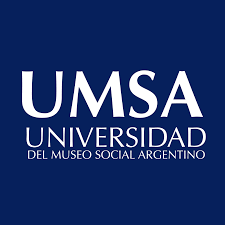

## **Análisis Exploratorio de los Datos**

## **Conjunto de Datos**

**El conjunto de datos *SaratogaHouses* del paquete mosaicData de R contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio de las viviendas, el conjunto de datos incluye 15 variables adicionales:**

- **price:** precio de la vivienda.
- **lotSize:** metros cuadrados de la vivienda.
- **age:** antigüedad de la vivienda.
- **landValue:** valor del terreno.
- **livingArea:** metros cuadrados habitables.
- **pctCollege:** porcentaje del vecindario con título universitario.
- **bedrooms:** número de dormitorios.
- **firplaces:** número de chimeneas.
- **bathrooms:** número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
- **rooms:** número de habitaciones.
- **heating:** tipo de calefacción.
- **fuel:** tipo de alimentación de la calefacción (gas, electricidad o diesel).
- **sewer:** tipo de desagüe.
- **waterfront:** si la vivienda tiene vistas al lago.
- **newConstruction:** si la vivienda es de nueva construcción.
- **centralAir:** si la vivienda tiene aire acondicionado.

## **Actualizando los módulos necesarios**

In [1]:
!pip install scikit-learn --upgrade

In [2]:
!pip install plotly --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## **Carga de módulos**

### **Para análisis de los datos**

In [3]:
import pandas as pd
import numpy as np

### **Para preprocesamiento de los datos**

In [4]:
from sklearn.model_selection import train_test_split

### **Para graficos**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

## **Carga de Datos**

In [6]:
url = "https://raw.githubusercontent.com/Viny2030/UMSA-Analisis_de_datos/refs/heads/main/SaratogaHouses.csv"

In [7]:
datos = pd.read_csv(url)
datos.head()

,Unnamed: 0,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,0,132500,0.09,42,50000,906,35,2,1.0,5,electric,electric,septic,No,No,No
1,1,181115,0.92,0,22300,1953,51,3,2.5,6,hot water/steam,gas,septic,No,No,No
2,2,109000,0.19,133,7300,1944,51,4,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,3,155000,0.41,13,18700,1944,51,3,1.5,5,hot air,gas,septic,No,No,No
4,4,86060,0.11,0,15000,840,51,2,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


**Se cambian los nombres de las columnas para mejor interpretacion...**

In [8]:
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios",
                 "chimenea", "baños", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

# **Análisis Exploratorio de los Datos**

El Análisis Exploratorio de los Datos es  una exploración descriptiva del Conjunto de Datos. Este proceso permite entender  qué información contiene cada variable, así como detectar  errores. Algunos ejemplos frecuentes son:

- **Que una columna se haya almacenado con el tipo de dato incorrecto:** una variable numérica está siendo reconocida como texto o viceversa.
- **Que una variable contenga valores que no tienen sentido:** por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.
- **Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.**

Además, el Análisis Exploratorio de los Datos puede dar pistas sobre qué variables son adecuadas como predictores en un modelo.

In [9]:
datos.head(4)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,0,132500,0.09,42,50000,906,35,2,1.0,5,electric,electric,septic,No,No,No
1,1,181115,0.92,0,22300,1953,51,3,2.5,6,hot water/steam,gas,septic,No,No,No
2,2,109000,0.19,133,7300,1944,51,4,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,3,155000,0.41,13,18700,1944,51,3,1.5,5,hot air,gas,septic,No,No,No


## **Tipos de Datos**

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   int64  
 2   antiguedad          1728 non-null   float64
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   baños               1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

##**Dimensiones del DataFrame y valores ausentes**

Se debe conocer el número de observaciones disponibles y si  ellas están completas. Los valores ausentes son muy importantes a la hora de crear modelos, la mayoría de algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas.

***Aunque la imputación de valores ausentes*** es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación a utilizar.

In [11]:
datos.shape # Dimensión del DataFrame, 2 dimensiones

(1728, 16)

In [12]:
datos.size # Cantidad de celdas del DataFrame

27648

In [13]:
datos.isna().sum().sort_values() # Cantidad de datos ausentes por variable del DataFrame

,0
precio,0
metros_totales,0
antiguedad,0
precio_terreno,0
metros_habitables,0
universitarios,0
dormitorios,0
chimenea,0
baños,0
habitaciones,0


##**Variable Objetivo o Variable Respuesta**

Es  importante estudiar la distribución de la variable objetivo o variable respuesta, ya que esta es la variable que interesa predecir.

La variable precio tiene una distribución asimétrica positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media. Este tipo de distribución suele visualizarse mejor tras aplicar logaritmo o raíz cuadrada.

In [14]:
px.histogram(datos,
             x = datos.precio,
             title="Distribución variable objetivo",
             color_discrete_sequence = ["red"], # color
             marginal="rug",
             template="gridon")

In [15]:
px.histogram(datos,
             x = np.sqrt(datos.precio),
             title="Transformación raíz cuadrada",
             color_discrete_sequence = ["green"], # color
             marginal="rug",
             template="gridon")

In [16]:
px.histogram(datos,
             x = np.log(datos.precio),
             title="Transformación logarítmica",
             color_discrete_sequence = ["olive"], # color
             marginal="rug",
             template="gridon")

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



**Algunos modelos de Machine Learning requieren que la variable objetivo se distribuya de una forma determinada. Por ejemplo, para los modelos de regresión lineal (LM), la distribución tiene que ser de tipo normal. Para otros modelos lineales, la distribución tiene que ser de la familia exponencial.**

##**Variables numéricas** - Análisis descriptivo

In [17]:
round(datos.select_dtypes(include=["float64", "int"]).describe(),2)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,baños,habitaciones
count,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00,1728.00
mean,863.50,211966.71,0.50,27.92,34557.19,1754.98,55.57,3.15,1.90,7.04
std,498.97,98441.39,0.70,29.21,35021.17,619.94,10.33,0.82,0.66,2.32
min,0.00,5000.00,0.00,0.00,200.00,616.00,20.00,1.00,0.00,2.00
25%,431.75,145000.00,0.17,13.00,15100.00,1300.00,52.00,3.00,1.50,5.00
50%,863.50,189900.00,0.37,19.00,25000.00,1634.50,57.00,3.00,2.00,7.00
75%,1295.25,259000.00,0.54,34.00,40200.00,2137.75,64.00,4.00,2.50,8.25
max,1727.00,775000.00,12.20,225.00,412600.00,5228.00,82.00,7.00,4.50,12.00


In [18]:
px.histogram(datos,
             x = datos.metros_totales,
             title="Metros Totales",
             color_discrete_sequence = ["blue"], # color
             template="gridon")

In [19]:
px.histogram(datos,
             x = datos.precio_terreno,
             title="Precio Terreno",
             color_discrete_sequence = ["darkorange"], # color
             template="gridon")

In [20]:
px.histogram(datos,
             x = datos.antiguedad,
             title="Antigüedad",
             color_discrete_sequence = ["black"], # color
             template="gridon")

In [21]:
px.histogram(datos,
             x = datos.metros_habitables,
             title="Metros habitables",
             color_discrete_sequence = ["magenta"], # color
             template="gridon")

In [22]:
px.histogram(datos,
             x = datos.universitarios,
             title="Universitarios",
             color_discrete_sequence = ["darkviolet"], # color
             template="gridon")

In [23]:
px.histogram(datos,
             x = datos.dormitorios,
             title="Dormitorios",
             color_discrete_sequence = ["turquoise"], # color
             template="gridon")

In [24]:
px.histogram(datos,
             x = datos.chimenea,
             title="Chimeneas",
             color_discrete_sequence = ["deeppink"], # color
             template="gridon")

In [25]:
px.histogram(datos,
             x = datos.baños,
             title="Baños",
             color_discrete_sequence = ["silver"], # color
             template="gridon")

In [26]:
px.histogram(datos,
             x = datos.habitaciones,
             title="Habitaciones",
             color_discrete_sequence = ["brown"], # color
             template="gridon")

***La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.***

In [27]:
datos.chimenea.value_counts()

,count
chimenea,
3,822
4,487
2,348
5,53
6,8
1,7
7,3


In [28]:
datos.chimenea = datos.chimenea.astype("str")

***Como el objetivo del estudio es predecir el precio de las viviendas, el análisis de cada variable se hace también en relación a la variable objetivo precio. Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.***

##**Correlación de las variables numéricas**

In [29]:
corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

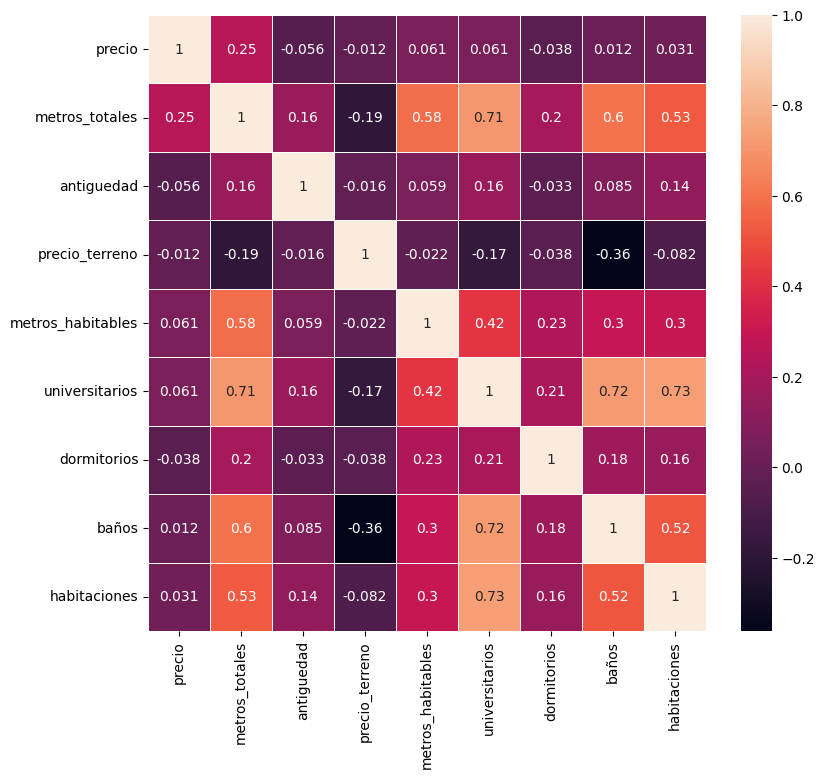

In [30]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=.5)

plt.show()

##**Variables cualitativas** - Análisis descriptivo

In [31]:
datos.select_dtypes(include=["object"]).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,7,3,3,3,2,2,2
top,3,hot air,gas,public/commercial,No,No,No
freq,822,1121,1197,1213,1713,1647,1093


**Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores.**

**En estos casos, suele ser conveniente:**
- **Eliminar las observaciones del grupo minoritario si es una variable multiclase.**
- **Eliminar la variable si solo tiene dos niveles.**
- **Agrupar los niveles minoritarios en un único grupo.**
- **Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.**

**Para este caso, hay que tener precaución con la variable chimenea.**

In [32]:
fig = px.histogram(datos,
                   x = datos.chimenea,
                   title="Chimenea",
                   color_discrete_sequence = ["brown"], # color
                   template="gridon")

fig.update_layout(bargap=0.2)

In [33]:
fig = px.histogram(datos,
                   x = datos.calefaccion,
                   title="Calefaccion",
                   template="gridon")
fig.show()

In [34]:
fig = px.histogram(datos,
                   x = datos.consumo_calefacion,
                   title="Consumo Calefaccion",
                   template="gridon")
fig.show()

In [35]:
fig = px.histogram(datos,
                   x = datos.desague,
                   title="Desague",
                   template="gridon")
fig.show()

In [36]:
fig = px.histogram(datos,
                   x = datos.vistas_lago,
                   title="Vistas al Lago",
                   template="gridon")
fig.show()

In [37]:
fig = px.histogram(datos,
                   x = datos.aire_acondicionado,
                   title="Aire Acondicionado",
                   template="gridon")
fig.show()

##**División del Conjunto de Datos en train y test**


In [38]:
X_train, X_test, y_train, y_test = train_test_split(datos.drop('precio', axis = 'columns'),
                                                    datos['precio'],train_size   = 0.8,
                                                    random_state = 2021, shuffle = True)

In [39]:
X_train.shape

(1382, 15)

In [40]:
X_test.shape

(346, 15)

In [41]:
y_train.shape

(1382,)

In [42]:
y_test.shape

(346,)

**Otra forma de división del Conjunto de Datos**

In [43]:
y = datos["precio"] # variable objetivo
X = datos.drop(columns=["precio"]) # vector de entrada

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
X_train.shape

(1382, 15)

In [46]:
X_test.shape

(346, 15)

In [47]:
y_train.shape

(1382,)

In [48]:
y_test.shape

(346,)